## Plotting Titanic Dataset. (DDL: 04/28/2023)

In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [40]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1. Create a bar chart for number of passengers survived by class 

<Axes: xlabel='Class', ylabel='Survived'>

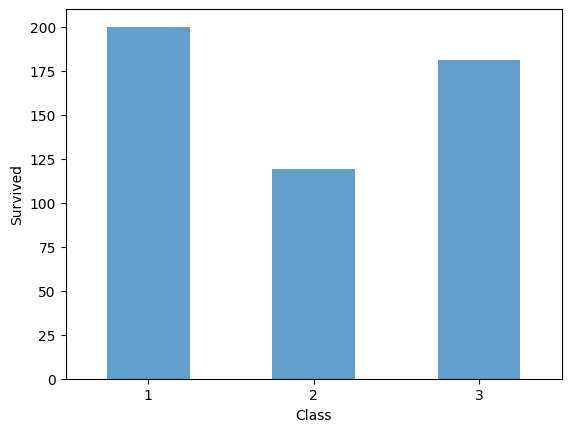

In [41]:
titanic.groupby('pclass').sum(numeric_only=True)['survived'].plot(kind='bar', rot=0, alpha=0.7, xlabel='Class', ylabel='Survived')

#### Analysis
The shown bar chart is showing a comparison between the number of survived passengers from the titatnic for the different classes that were onboard.

#### Observation
The highest survival rate was with the first class, with the third class coming in the second place, and lastly the second class.

#### Conclusion
I would say probably because the numbers of passengers per class wasn't taken into consideration in this analysis, the third class is high in survival rate because there were way more third class passengers than first and second, that may be a reason, the second is maybe if the third class had mostly women and children, it would mean that most of the third class survived, all these parameters weren't included in the analysis.

#### 2. Create a vertical bar chart for passengers survived by class and gender

<Axes: xlabel='Class', ylabel='Survived'>

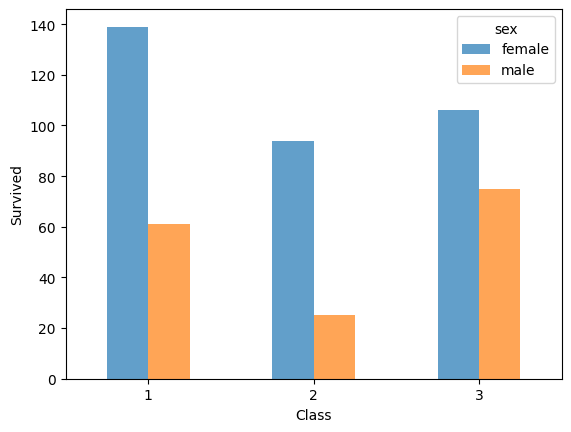

In [42]:
titanic.groupby(['pclass','sex']).sum(numeric_only=True)['survived'].unstack().plot(kind='bar', ylabel='Survived', xlabel='Class', rot=0, alpha=0.7)

#### Analysis

Here we are discussing the gender factor in the overall survival rate, with a bar chart showing the class and gender against the survival count

#### Observation

In all classes the ratio of female surviving to males is higher, while in classes like the first and second classes are relatively more gapped than the ratio in the third class.

#### Conclusion

Second and first class males were among the unluckiest, while the third class ratio was not relatively as gapped, still for the three classes females were the most surviving gender, probably because of chivlary.

#### 3. Create a stacked chart survived vs dead for different classes and gender

<Axes: xlabel='Class', ylabel='Survived'>

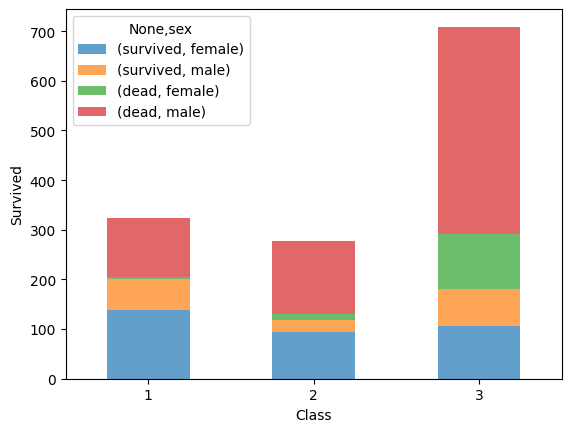

In [43]:
titanic['dead'] = (titanic['survived'] == 0).astype('int')
titanic.groupby(['pclass', 'sex']).sum(numeric_only=True)[['survived', 'dead']].unstack().plot(kind='bar', stacked=True, rot=0, alpha=0.7, xlabel='Class', ylabel='Survived')

#### Analysis

A stacked barchart to show the differences between the survival rate given different parameters like gender, and class.

#### Observation

Males are among the unluckiest, with an obvious high rate of death among the three classes, while females were among the luckiest in the three classes, they weren't as lucky in the third class, but again, it may be because the number of third class passengers was the highest.

Survived males in the first and third class numbers are close to each other, while in second class, mostly only females survived.

#### Conclusion

The factor of number of passengers per class plays a big role, where the third class was the most abundant class, the values appear to be greater than the rest of the classes.

Males deaths dominate the 3 classes, female survivals comes second in place in every class.

Only third class we can say that the rate of deaths of males were almost as much as males.

#### 4. Plot histogram of fares paid for passengers in cabin 30

[53.1    30.5    61.9792]


<Axes: >

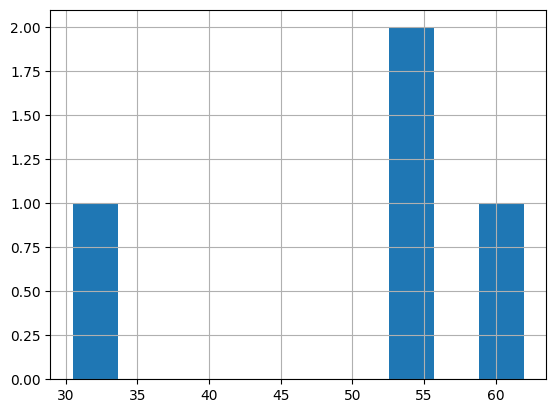

In [44]:
cabin_30 = titanic[(titanic['cabin'] == 'C30') | ((titanic['cabin'] == 'B30') | (titanic['cabin'] == 'D30'))]
print(cabin_30['fare'].unique())
cabin_30['fare'].hist()

#### Analysis

A histogram to show frequencies of fares paid for each cabin

#### Observation

Only three values were paid for cabin number 30, those were 53.1, 30.5, and 61.9792.

#### Conclusion

Fares for cabin 30 were divided into 3 values, probably for different sizez.

#### 5. Create a box plot of the fares by passenger class

<Axes: title={'center': 'fare'}, xlabel='Class', ylabel='Fare'>

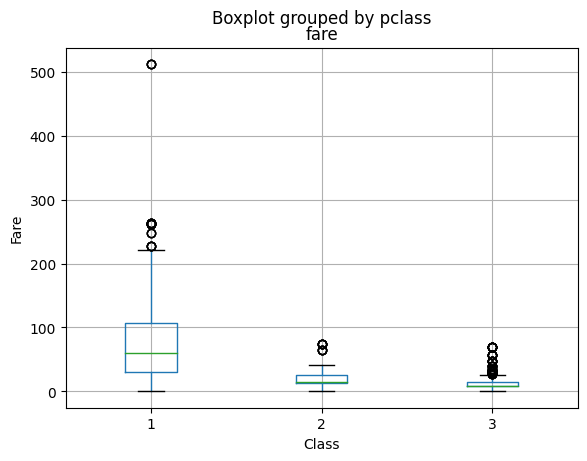

In [45]:
titanic.boxplot(column='fare', by='pclass', xlabel='Class', ylabel='Fare')

#### Analysis

Box plot for the fares for each class of passengers.

#### Observation

Fares average goes from high to low from first class to third class, as expected, while values remain consistent in second and third classes, first class has the biggest variance in values, with a couple of outlier values that appear.


#### Conclusion

First class has multiple outlier values, probably for extravaganzic benefits, while the rest of the classes average fare remain within a reasonable variance, these differences may be a result of different benefits on the ticket, like bigger cabins or better food.

#### 6. Create a box plot of the age by passenger class

<Axes: title={'center': 'age'}, xlabel='Class', ylabel='Age'>

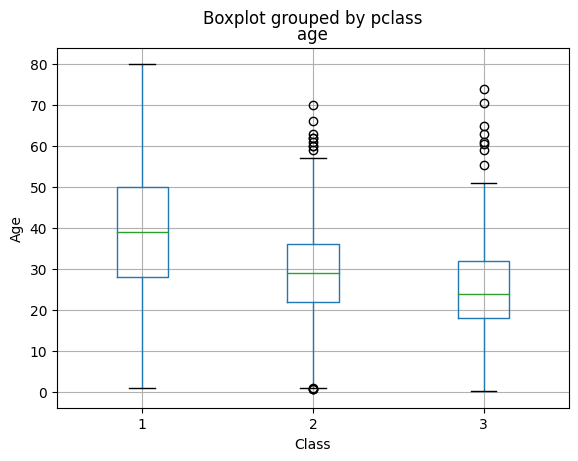

In [46]:
titanic.boxplot(column='age', by='pclass', xlabel='Class', ylabel='Age')

#### Analysis

Boxplot for the ages of passengers differentiated by ticket class

#### Observation

First class spans along the whole 80 years, while the average remain around 40 years old.

For the second class the average age was around 30 years old, and the maximum age was way below the first class.

For the first class the average age was around 25 years old, and the maximum age was around 50 years old.

#### Conclusion

The ages of the first class was probably diverse because it may have been a family trip for them, taking along the whole spectrum of generations, making the average ages of the passengers of the first class that way.

#### Try Plotly to do the above questions.
Points:
- **Total: 100**
- Code: 90
- Documentation within IPython using Markdown: 10

In [47]:
import plotly.express as px
import plotly.graph_objects as go

titanic['survived_literal'] = np.where(titanic['survived'] == 1, 'survived', 'died')
fig = px.bar(titanic.groupby(['pclass']).sum(numeric_only=True)['survived'])
fig.show()

In [48]:
fig = px.bar(titanic, x='pclass', y='survived', color='sex', barmode='group')
fig.show()

In [49]:
px.bar(titanic, x='survived_literal', color='sex', facet_col='pclass')

In [50]:
px.histogram(cabin_30, x='fare')

In [51]:
px.box(titanic, x='pclass', y='fare')

In [52]:
px.box(titanic, y='age', x='pclass')